In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(1280, 960, 3)


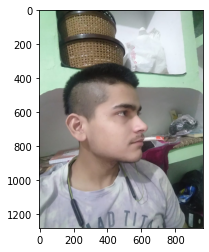

In [16]:
im = cv2.imread('./WhatsApp Image 2020-05-24 at 9.22.27 PM.jpeg')
print(im.shape)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [17]:
## flatten each channel of the image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(1228800, 3)


In [18]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [19]:
centers = km.cluster_centers_

In [21]:
centers = np.array(centers, dtype="uint8")
print(centers)

[[125 119 111]
 [ 53  51  48]
 [212 227 223]
 [177 177 174]]


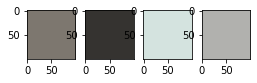

In [22]:
i = 1

plt.figure(0, figsize=(4,2))

colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    
    colors.append(each_col)
    
    # color swatch
    a = np.zeros((100,100,3), dtype="uint8")
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [23]:
### segmenting out original image

In [26]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

(1228800, 3)


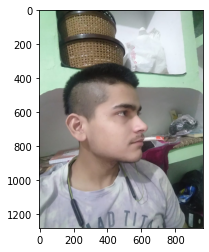

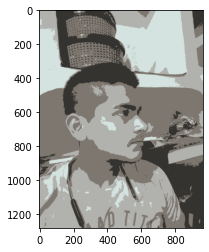

In [31]:
new_img = np.zeros((1280*960,3), dtype="uint8")

print(new_img.shape)

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((1280, 960, 3))
plt.imshow(im)
plt.show()
plt.imshow(new_img)
plt.show()